In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
from datetime import datetime
# today = datetime.now().strftime("%m%d%y")
today = "092324"

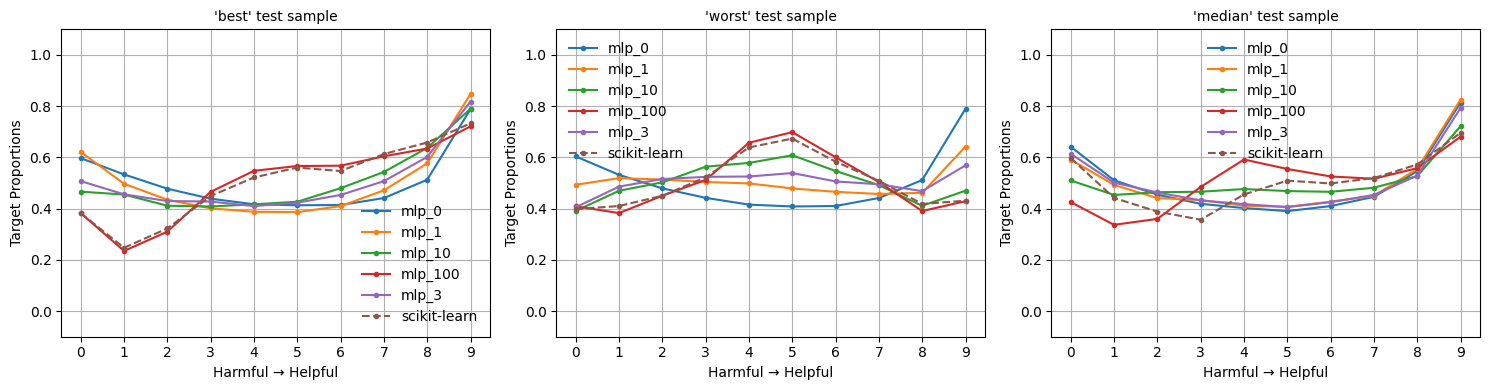

In [5]:
cs = pd.read_csv(f"./saved_data/chunk_stats_0_4_123__{today}.csv")
# cs["epoch"] = cs["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn")
# cs = cs[~cs["epoch"].isin(["mlp_10"])].copy() ## weird sample

stats_mean = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).mean(numeric_only=True)
stats_std  = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).std(numeric_only=True)

# best / median / worst
_, axes = plt.subplots(ncols=3, figsize=(15,4))

class_labels = ["best", "worst", "median"]
for i, class_label in enumerate(class_labels):
    _mean = stats_mean.xs(class_label, level="class_label")
    _std  = stats_std.xs(class_label, level="class_label")
    
    for epoch in _mean.index:
        ls = "--" if epoch == "scikit-learn" else "-"
        axes[i].plot(np.arange(10), _mean.loc[epoch], label=epoch, ls=ls, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[epoch], _std.loc[epoch], label=epoch)

    axes[i].set_title(f"'{class_label}' test sample", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_4_123__092324.png")

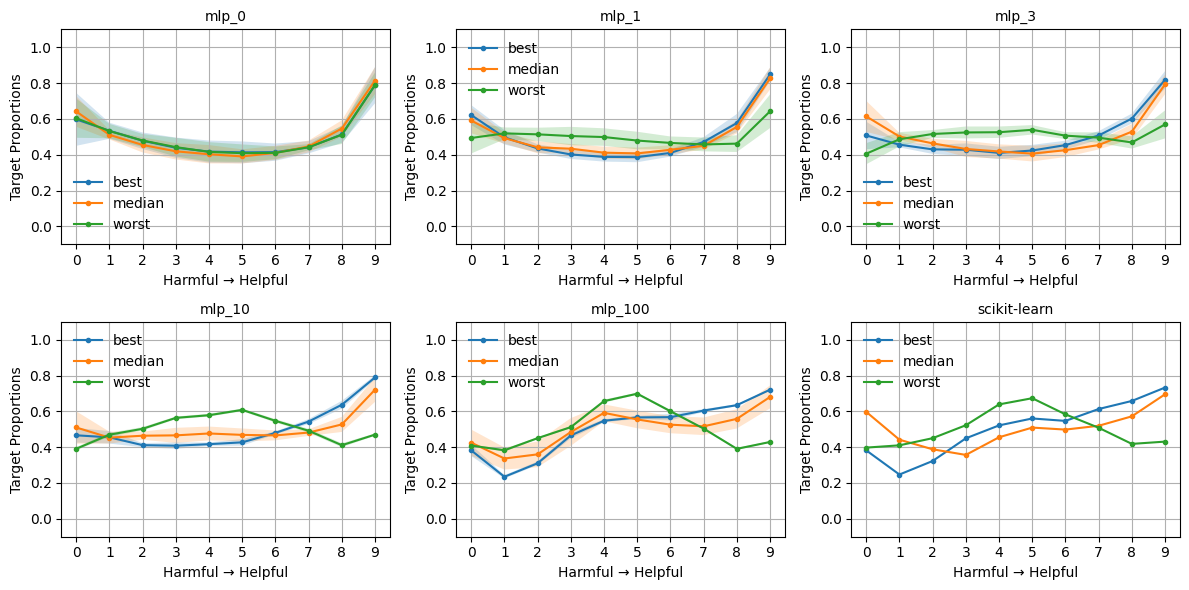

In [6]:
epoch_labels = cs["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]
# print(epoch_labels)
_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    _mean = stats_mean.xs(epoch_label, level="epoch")
    _std  = stats_std.xs(epoch_label, level="epoch")

    for class_label in _mean.index:
        axes[i].plot(np.arange(10), _mean.loc[class_label], label=class_label, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[class_label], _std.loc[class_label], label=class_label, marker="o", markersize=3)
        lb = _mean.loc[class_label] - _std.loc[class_label]
        ub = _mean.loc[class_label] + _std.loc[class_label]
        axes[i].fill_between(np.arange(10), lb, ub, alpha=.2)
    
    axes[i].set_title(f"{epoch_label}", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_4_123__092324_2.png")

In [7]:
qt = pd.read_csv(f"./saved_data/quantile_stats_0_4_123__{today}.csv")
# qt = pd.read_csv(f"quantile_stats_0_0.01__092324.csv")
# qt["epoch"] = qt["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn") 

display(qt)

# normalize
for x in qt:
    if x.startswith("quantile"):
        qt[x] = qt[x] / qt["quantile_10"] 
        
qt.drop(["quantile_0", "quantile_10"], axis=1, inplace=True)
# display(qt)

qt_stats = qt.drop("round", axis=1).groupby(["epoch", "class_label"]).mean()

,epoch,class_label,round,quantile_0,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_7,quantile_8,quantile_9,quantile_10
0,scikit-learn,worst,0,-0.014720,-3.757334e-04,-1.748614e-04,-8.645852e-05,-4.082854e-05,-1.203423e-05,1.096483e-05,4.318832e-05,1.138045e-04,3.221685e-04,0.042384
1,scikit-learn,best,0,-0.000023,-2.466035e-07,-8.427061e-08,-1.318978e-08,3.597521e-08,8.356001e-08,1.416395e-07,2.237950e-07,3.705387e-07,6.979429e-07,0.000013
2,scikit-learn,median,0,-0.000596,-9.039936e-06,-3.830627e-06,-1.583934e-06,-2.428910e-07,8.325661e-07,2.054904e-06,3.785736e-06,7.018481e-06,1.422226e-05,0.000313
3,mlp_0,best,0,-0.007979,-7.545419e-04,-4.651017e-04,-2.860274e-04,-1.468899e-04,-1.771852e-05,1.092519e-04,2.481075e-04,4.292532e-04,7.044944e-04,0.006123
4,mlp_0,worst,0,-0.004917,-8.896571e-04,-5.018633e-04,-2.549505e-04,-5.214914e-05,1.317814e-04,3.176703e-04,5.337465e-04,8.058080e-04,1.294111e-03,0.009752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,mlp_10,worst,9,-0.005344,-6.756762e-04,-3.845914e-04,-2.287824e-04,-1.122157e-04,-8.963972e-06,9.385584e-05,2.056887e-04,3.669814e-04,6.818454e-04,0.013583
149,mlp_10,median,9,-0.001027,-1.588525e-04,-8.773361e-05,-4.439261e-05,-9.431412e-06,2.170354e-05,5.327220e-05,8.897389e-05,1.394301e-04,2.279643e-04,0.002068
150,mlp_100,best,9,-0.000022,-2.527620e-07,-9.317180e-08,-2.329346e-08,2.175234e-08,6.415890e-08,1.158826e-07,1.929251e-07,3.285590e-07,6.341518e-07,0.000011
151,mlp_100,worst,9,-0.013619,-4.408125e-04,-1.943811e-04,-9.448975e-05,-3.976324e-05,-6.925183e-06,1.775902e-05,5.469123e-05,1.322304e-04,3.886158e-04,0.045232


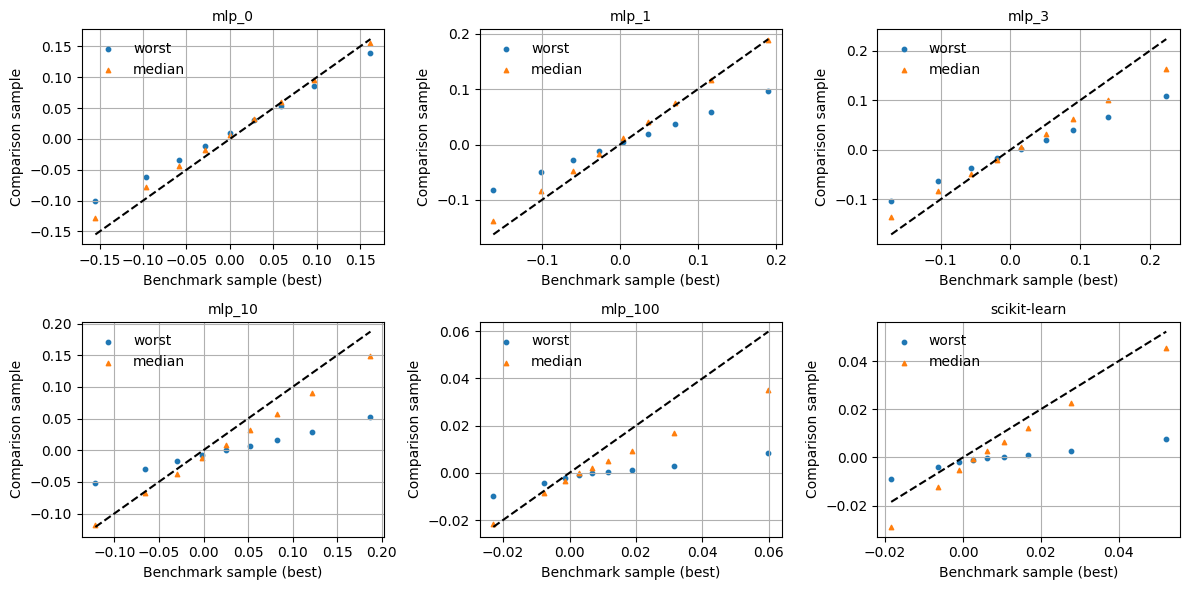

In [8]:
epoch_labels = qt["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]

_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    tmp = pd.concat([
        qt_stats.loc[(epoch_label,"best")],
        qt_stats.loc[(epoch_label,"median")],
        qt_stats.loc[(epoch_label,"worst")],
    ], axis=1)[epoch_label]

    tmp.plot.scatter(x="best", y="worst", label="worst", s=10, ax=axes[i])
    tmp.plot.scatter(x="best", y="median", label="median", s=10, c="C1", marker="^", ax=axes[i])
    axes[i].plot(tmp["best"], tmp["best"], ls="--", c="k")
    axes[i].grid()
    axes[i].legend(frameon=False)
    axes[i].set_title(epoch_label, fontsize=10)
    axes[i].set_xlabel("Benchmark sample (best)")
    axes[i].set_ylabel("Comparison sample")

plt.tight_layout()
plt.savefig("imgs/quantile_stats_0_4_123__092324.png")

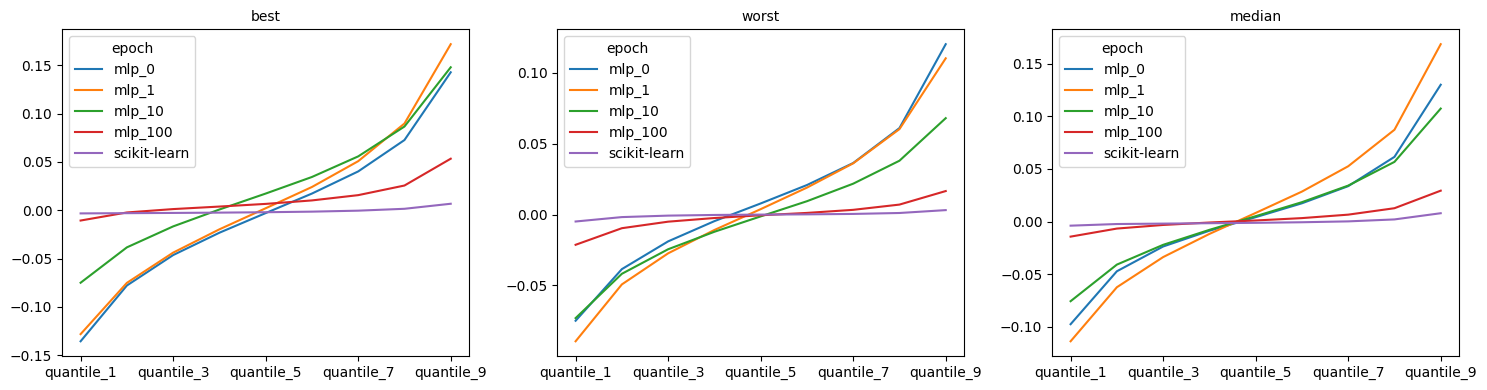

In [166]:
# kind of the sample plot below...
# class_labels = qt["class_label"].unique()
class_labels = ["best", "worst", "median"]

_, axes = plt.subplots(ncols=len(class_labels), figsize=(15,4))

for i, class_label in enumerate(class_labels):
    tmp = qt_stats.xs(class_label, level="class_label")
    benchmark = tmp.loc["scikit-learn"]
    # tmp_df = tmp / benchmark.abs() 
    # tmp_df.T.plot(ax=axes[i])
    tmp.T.plot(ax=axes[i])
    axes[i].set_title(class_label, fontsize=10)

plt.tight_layout();